# Are There Patterns in UFO Sightings and Can They be Predicted?

By: Samir Chawla<br>
Original Publication Date: Wednesday August 16, 2023

<img src="DALL·E 2023-08-16 18.49.08 - Unbelievable UFO sighting in the USA.png" alt="UFO Sighting" width="550">

### Background on UFO Sightings

Unidentified Flying Objects (UFOs) have captivated the human imagination for decades, if not centuries. The term "UFO" was officially coined in the 1950s by the United States Air Force (USAF) to describe any aerial phenomenon that could not be immediately identified. While many UFO sightings have mundane explanations such as atmospheric phenomena, balloons, aircraft, and celestial events, a small percentage remain unexplained even after thorough scientific scrutiny. These enigmatic sightings have spurred a myriad of theories, from top-secret military experiments to extraterrestrial visitors. Public interest in UFOs has surged at various points in time, influenced by factors like popular culture, personal encounters, or notable investigations by both governmental and civilian entities.
<br><br>

### Purpose of the Project

Given the enduring fascination with UFO sightings in the United States, this project seeks to determine if there are discernible patterns within these reported encounters. The investigation narrows its focus on three main facets: the shape of the UFOs, the geographic locations of the sightings within the U.S., and the dates of these occurrences. Delving into the shapes could offer insights into technological consistencies or variances in the described crafts. By analyzing the U.S. locations, we might uncover regions with a heightened frequency of sightings, potentially associated with factors like population density, military bases, or natural occurrences. Finally, an exploration of the sighting dates could help discern any temporal trends, such as a surge in reports during certain times or events.
<br><br>

### Seeking Patterns in the Unknown

Through the analysis and modeling of data on UFO sightings, this project endeavors to uncover patterns that might shed light on the nature of these phenomena. Are there certain UFO shapes more commonly observed in particular regions? Do sightings cluster around certain dates or times of the year? Answering these types of questions is the primary aspiration of this project. While it's crucial to approach the topic with skepticism and apply rigorous scientific methods, searching for patterns amidst the myriad UFO reports is a testament to human curiosity and the perpetual quest to comprehend the unknown.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import re

from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display

from wordcloud import WordCloud, STOPWORDS

### Import Dataset
Dataset Downloaded From: https://data.world/timothyrenner/ufo-sightings

In [ ]:
UFO_df = pd.read_csv("nuforc_reports.csv")

### Data Exploration

In [4]:
UFO_df.head(10)

,summary,country,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,MADAR Node 100,USA,Mountlake Terrace,WA,2019-06-23T18:53:00,NaN,NaN,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/147/S...,MADAR Node 100,2019-06-27T00:00:00,47.794100,-122.306600
1,Steady flashing object with three lights hover...,USA,Hamden,CT,2019-06-23T20:00:00,light,5 hours,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,http://www.nuforc.org/webreports/reports/147/S...,Steady flashing object with three lights hover...,2019-06-27T00:00:00,41.373941,-72.921325
2,"Group of several orange lights, seemingly circ...",USA,Charlottesville,VA,2019-06-20T23:28:00,circle,15 seconds,Occurred : 6/20/2019 23:28 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,"Group of several orange lights, seemingly circ...",2019-06-27T00:00:00,38.055968,-78.494482
3,Dropped in flashed a few times and shot off 5 ...,USA,Lincoln Park,MI,2019-06-21T00:00:00,light,2 minutes,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,Dropped in flashed a few times and shot off 5 ...,2019-06-27T00:00:00,42.238500,-83.178300
4,"Llike a star at first glance, got brighter and...",USA,San jacinto,CA,2019-07-06T00:30:00,sphere,25 seconds,Occurred : 7/6/2019 00:30 (Entered as : 7/6/1...,http://www.nuforc.org/webreports/reports/147/S...,"Looked like a star at first glance, got bright...",2019-07-12T00:00:00,33.794093,-116.949989
5,Light in the sky moving from south to north wi...,USA,Otis Orchards,WA,2019-07-06T02:00:00,light,45 minutes,Occurred : 7/6/2019 02:00 (Entered as : 07/6/...,http://www.nuforc.org/webreports/reports/147/S...,Light in the sky moving from south to north wi...,2019-07-12T00:00:00,47.695900,-117.107800
6,"Glowing circle moving through the sky. Canton,...",USA,Canton,CT,2019-06-28T21:00:00,circle,5 minutes,Occurred : 6/28/2019 21:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/147/S...,"Glowing circle moving through the sky. Canton,...",2019-07-12T00:00:00,41.840900,-72.897800
7,"The crew of an airliner at 34,000' witnesses a...",USA,Akron,CO,2019-06-30T08:25:00,sphere,Seconds,Occurred : 6/30/2019 08:25 (Entered as : 06/3...,http://www.nuforc.org/webreports/reports/147/S...,"The crew of an airliner at 34,000' witnesses a...",2019-07-12T00:00:00,40.182800,-103.222700
8,MADAR Node 128,USA,Helena,MT,2019-07-01T14:48:00,NaN,NaN,Occurred : 7/1/2019 14:48 (Entered as : 07/01...,http://www.nuforc.org/webreports/reports/147/S...,MADAR Node 128,2019-07-12T00:00:00,46.627429,-112.012735
9,"Fixed object above clouds southeast of Nevada, MO",USA,Nevada,MO,2019-07-22T14:45:00,unknown,ongoing at 15:33,Occurred : 7/22/2019 14:45 (Entered as : 07/2...,http://www.nuforc.org/webreports/reports/147/S...,"Fixed object above clouds southeast of Nevada,...",2019-07-25T00:00:00,37.839400,-94.359400


### Basic Data Cleaning

In [3]:
# Filter only the USA
UFO_df = UFO_df[UFO_df['country'] == 'USA'].reset_index(drop=True)

# List of all valid state abbreviations
all_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA",
              "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK",
              "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# Remove rows with invalid states
UFO_df = UFO_df[UFO_df["state"].isin(all_states)].reset_index(drop=True)

In [4]:
UFO_df

,summary,country,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,MADAR Node 100,USA,Mountlake Terrace,WA,2019-06-23T18:53:00,NaN,NaN,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/147/S...,MADAR Node 100,2019-06-27T00:00:00,47.794100,-122.306600
1,Steady flashing object with three lights hover...,USA,Hamden,CT,2019-06-23T20:00:00,light,5 hours,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,http://www.nuforc.org/webreports/reports/147/S...,Steady flashing object with three lights hover...,2019-06-27T00:00:00,41.373941,-72.921325
2,"Group of several orange lights, seemingly circ...",USA,Charlottesville,VA,2019-06-20T23:28:00,circle,15 seconds,Occurred : 6/20/2019 23:28 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,"Group of several orange lights, seemingly circ...",2019-06-27T00:00:00,38.055968,-78.494482
3,Dropped in flashed a few times and shot off 5 ...,USA,Lincoln Park,MI,2019-06-21T00:00:00,light,2 minutes,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,Dropped in flashed a few times and shot off 5 ...,2019-06-27T00:00:00,42.238500,-83.178300
4,"Llike a star at first glance, got brighter and...",USA,San jacinto,CA,2019-07-06T00:30:00,sphere,25 seconds,Occurred : 7/6/2019 00:30 (Entered as : 7/6/1...,http://www.nuforc.org/webreports/reports/147/S...,"Looked like a star at first glance, got bright...",2019-07-12T00:00:00,33.794093,-116.949989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125294,See craft every evening when I get out of work...,USA,Branford,CT,2021-12-19T23:00:00,circle,NaN,Occurred : 12/19/2021 23:00 (Entered as : 12/...,http://www.nuforc.org/webreports/reports/165/S...,See craft every evening when I get out of work...,2021-12-19T00:00:00,41.277600,-72.811500
125295,MADAR Node 70,USA,St Louis,MO,2022-03-09T00:48:00,NaN,NaN,Occurred : 3/9/2022 00:48 (Entered as : 03/09...,http://www.nuforc.org/webreports/reports/167/S...,MADAR Node 70 \n \n,2022-04-22T00:00:00,38.626989,-90.307029
125296,A very small white light hovering above the cl...,USA,Batavia,IL,2013-04-30T02:19:00,circle,45 seconds,Occurred : 4/30/2013 02:19 (Entered as : 04/3...,http://www.nuforc.org/webreports/reports/097/S...,A very small white light hovering above the cl...,2013-05-15T00:00:00,41.847800,-88.307500
125297,I was young. You know what? It was pretty fuck...,USA,Liberty Lake,WA,1995-07-21T09:00:00,circle,1/12,Occurred : 7/21/1995 09:00 (Entered as : 07/2...,http://www.nuforc.org/webreports/reports/151/S...,I was young. You know what? It was pretty ((...,2019-12-19T00:00:00,47.651700,-117.083800


In [ ]:
# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Iterate through rows with missing coordinates
for index, row in UFO_df[UFO_df["city_latitude"].isnull()].iterrows():
    location_query = f"{row['city']}, {row['state']}"

    try:
        location = geolocator.geocode(location_query)
        if location:
            UFO_df.loc[index, "city_latitude"] = location.latitude
            UFO_df.loc[index, "city_longitude"] = location.longitude
        else:
            # If city coordinates not found, try coordinates for the state
            state_location_query = f"{row['state']}, USA"
            state_location = geolocator.geocode(state_location_query)
            if state_location:
                UFO_df.loc[index, "city_latitude"] = state_location.latitude
                UFO_df.loc[index, "city_longitude"] = state_location.longitude
            else:
                print(f"Coordinates not found for both {location_query} and {state_location_query}")
    except Exception as e:
        state_location_query = f"{row['state']}, USA"
        state_location = geolocator.geocode(state_location_query)
        if state_location:
            UFO_df.loc[index, "city_latitude"] = state_location.latitude
            UFO_df.loc[index, "city_longitude"] = state_location.longitude

In [5]:
# Define the latitude and longitude ranges for the continental U.S. and Alaska & Hawaii
continental_us_lat_range = (24.396308, 49.384358)
continental_us_lon_range = (-125.001650, -66.934570)
alaska_lat_range = (49.384358, 71.538800)
alaska_lon_range = (-179.148909, -129.981125)
hawaii_lat_range = (18.910000, 20.265000)
hawaii_lon_range = (-161.755833, -154.806773)

# Filter out rows with invalid latitude and longitude combinations
valid_lat_lon = (
    (UFO_df["state"] == "AK") & (UFO_df["city_latitude"].between(*alaska_lat_range)) & (UFO_df["city_longitude"].between(*alaska_lon_range)) |
    (UFO_df["state"] == "HI") & (UFO_df["city_latitude"].between(*hawaii_lat_range)) & (UFO_df["city_longitude"].between(*hawaii_lon_range)) |
    (UFO_df["city_latitude"].between(*continental_us_lat_range)) & (UFO_df["city_longitude"].between(*continental_us_lon_range))
)

UFO_df = UFO_df[valid_lat_lon].reset_index(drop=True)

In [6]:
# View all possibilities of 'shape' field
print(UFO_df['shape'].unique())

# Consolidate Similar Shapes
UFO_df['shape'] = UFO_df['shape'].replace([np.nan, 'unknown'], 'other')
UFO_df['shape'] = UFO_df['shape'].replace(['sphere','disk', 'oval','egg','teardrop'], 'circle')
UFO_df['shape'] = UFO_df['shape'].replace(['cigar','rectangle'], 'cylinder')
UFO_df['shape'] = UFO_df['shape'].replace(['delta','diamond','cone','chevron'], 'triangle')
UFO_df['shape'] = UFO_df['shape'].replace(['cross','fireball'], 'star')
UFO_df['shape'] = UFO_df['shape'].replace('flash', 'light')

[nan 'light' 'circle' 'sphere' 'unknown' 'chevron' 'cigar' 'other'
 'triangle' 'oval' 'teardrop' 'flash' 'rectangle' 'formation' 'disk'
 'fireball' 'egg' 'changing' 'cylinder' 'diamond' 'cone' 'cross' 'delta'
 'star']


In [7]:
print(UFO_df['shape'].unique())

['other' 'light' 'circle' 'triangle' 'cylinder' 'formation' 'star'
 'changing']


In [8]:
# Create a function to extract date and time
def extract_date_time(s):
    matches = re.findall(r'(\d{1,2}/\d{1,2}/\d{2,4}\s+\d{1,2}:\d{2}\s*[APapMm]+)', s)
    if matches:
        date_str = matches[0]
        # Fix two-digit year format
        date_str = re.sub(r'(\d{1,2}/\d{1,2}/)(\d{2})\s+', r'\120\2 ', date_str)
        return date_str
    return None

# Apply the function to create a new column
UFO_df['date_time_of_sighting'] = pd.to_datetime(UFO_df['date_time'], errors='coerce')
date_time_na_indices = UFO_df['date_time_of_sighting'].isna()

# Extract date from 'stats' column if 'date_time' column is NaN
stats_date_time = UFO_df.loc[date_time_na_indices, 'stats'].apply(extract_date_time)
UFO_df.loc[date_time_na_indices, 'date_time_of_sighting'] = pd.to_datetime(stats_date_time, errors='coerce')

# Drop rows where 'date_time_of_sighting' couldn't be extracted
UFO_df.dropna(subset=['date_time_of_sighting'], inplace=True)
UFO_df.reset_index(drop=True, inplace=True)

C:\Users\samir\AppData\Local\Temp\ipykernel_4988\2456023887.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  UFO_df.loc[date_time_na_indices, 'date_time_of_sighting'] = pd.to_datetime(stats_date_time, errors='coerce')


### Expore Data Further for Interesting Patterns

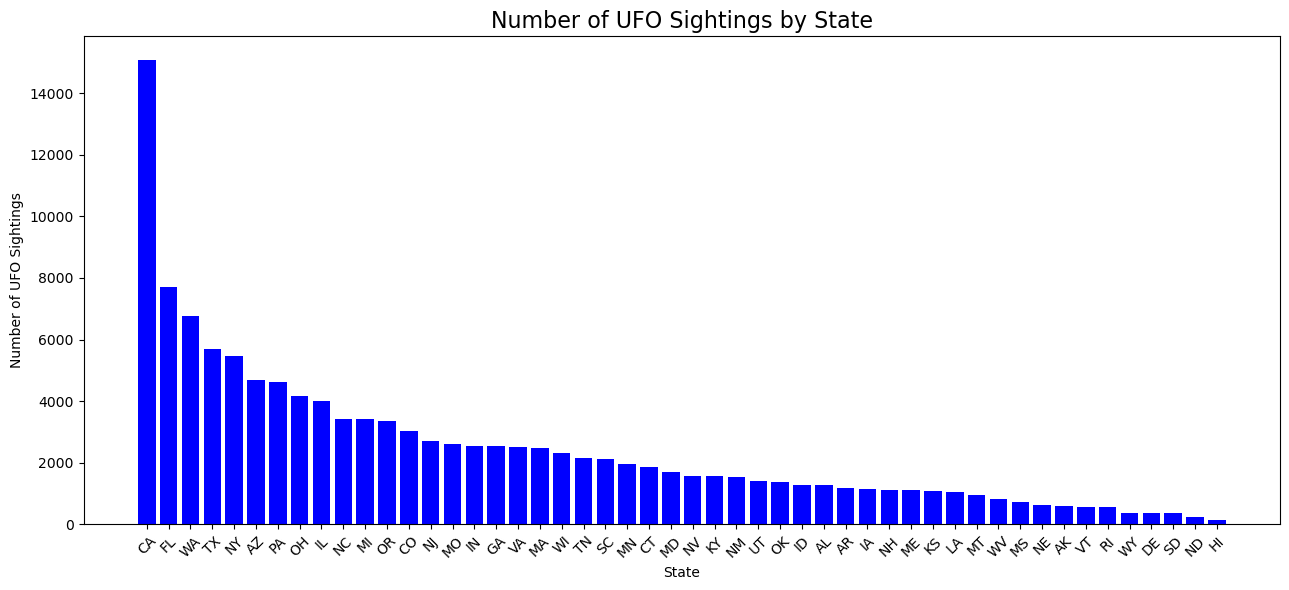

In [9]:
# Calculate the count of sightings for each state
state_counts = UFO_df["state"].value_counts().reset_index()
state_counts.columns = ["state", "count"]

# Sort the DataFrame by count in descending order
state_counts = state_counts.sort_values(by="count", ascending=False)

# Create a bar plot
plt.figure(figsize=(13, 6))
plt.bar(state_counts["state"], state_counts["count"], color='blue')
plt.xlabel("State")
plt.ylabel("Number of UFO Sightings")
plt.title("Number of UFO Sightings by State", fontsize=16)
plt.xticks(rotation=45)

# Spacing out the x-axis labels
plt.xticks(range(len(state_counts["state"])), state_counts["state"])

plt.tight_layout()

# Show the plot
plt.show()

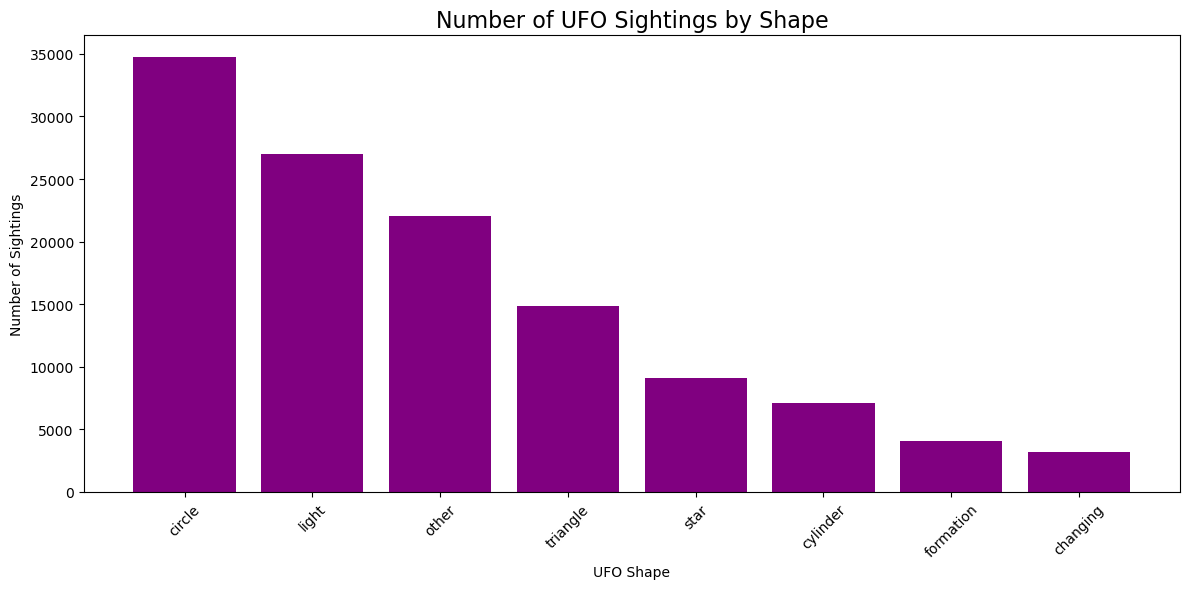

In [10]:
# Calculate the count of sightings for each shape
shape_counts = UFO_df["shape"].value_counts().reset_index()
shape_counts.columns = ["shape", "count"]

# Sort the DataFrame by count in descending order
shape_counts = shape_counts.sort_values(by="count", ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(shape_counts["shape"], shape_counts["count"], color='purple')
plt.xlabel("UFO Shape")
plt.ylabel("Number of Sightings")
plt.title("Number of UFO Sightings by Shape", fontsize=16)
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()

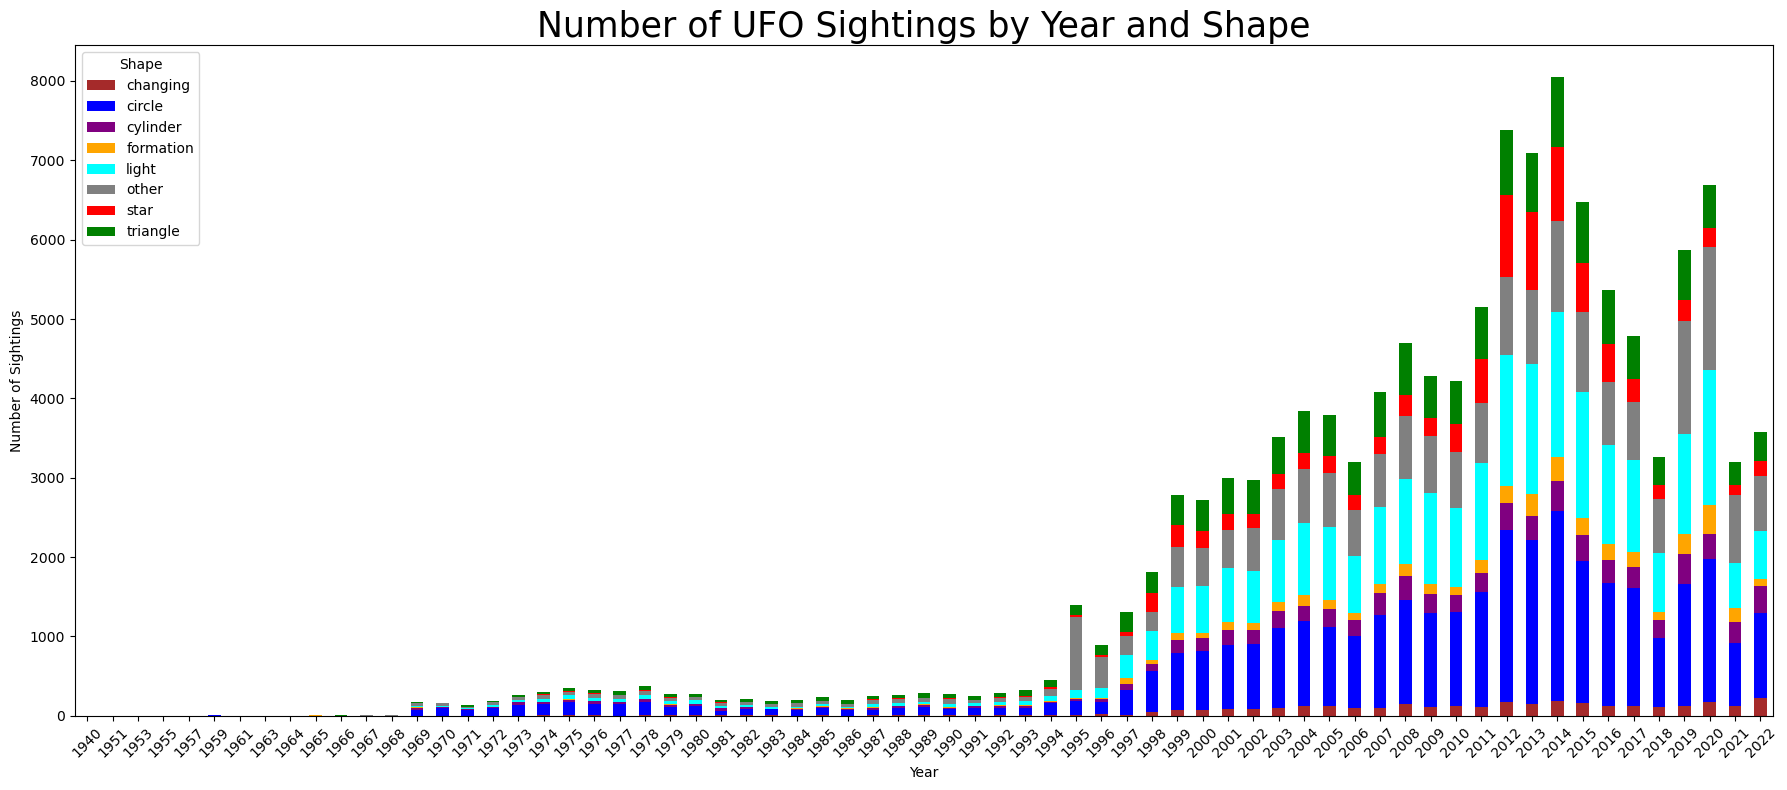

In [11]:
# Load your UFO dataset into a DataFrame (replace this with your data loading code)
# UFO_df = pd.read_csv("your_dataset.csv")

# Convert the date_time column to datetime format
UFO_df["date_time_of_sighting"] = pd.to_datetime(UFO_df["date_time_of_sighting"])

# Extract the year from the date_time column
UFO_df["year"] = UFO_df["date_time_of_sighting"].dt.year

# Define colors for each shape
shape_colors = {
    "circle": "blue",
    "triangle": "green",
    "star": "red",
    "cylinder": "purple",
    "formation": "orange",
    "changing": "brown",
    "other": "gray",
    "light": "cyan"
}

# Calculate the count of sightings for each year and shape
year_shape_counts = UFO_df.groupby(["year", "shape"]).size().unstack(fill_value=0)

# Set a larger default figure size
plt.rcParams['figure.figsize'] = [18, 8]  # Adjust the width and height here

# Create a stacked bar plot with customized colors
ax = year_shape_counts.plot(kind="bar", stacked=True, color=[shape_colors.get(shape, "gray") for shape in year_shape_counts.columns])

plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.title("Number of UFO Sightings by Year and Shape", fontsize=25)
plt.legend(title="Shape")

plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert the "date_time" column to datetime objects
UFO_df["date_time_of_sighting"] = pd.to_datetime(UFO_df["date_time_of_sighting"])

# Calculate the date 5 years ago from today
five_years_ago = datetime.now() - timedelta(days=5 * 365)

# Filter the DataFrame to include only the last 5 years of data
filtered_df = UFO_df[UFO_df["date_time_of_sighting"] >= five_years_ago]

# Create a map centered on the continental USA
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add a centered title to the map
title_html = """
<div style="position: fixed; top: 10px; left: 50%; transform: translateX(-50%); z-index:1000;
            font-size:18px; font-weight:bold; text-align:center;">
    UFO Sightings in the Last 5 Years
</div>
"""
m.get_root().html.add_child(folium.Element(title_html))

# Define shape colors for valid shapes
shape_color = {
    "circle": "blue",
    "triangle": "green",
    "star": "red",
    "light": "orange",
    "cylinder": "purple",
    "formation": "cyan",
    "changing": "pink",
    "other": "gray"
}

# Add markers for each sighting within the last 5 years
for index, row in filtered_df.iterrows():
    marker_color = shape_color.get(row["shape"].lower(), "gray")  # Convert shape to lowercase

    folium.CircleMarker(
        location=[row["city_latitude"], row["city_longitude"]],
        radius=5,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.7,
        popup=row["shape"]
    ).add_to(m)

# Create a legend
legend_html = """
<div style="position: fixed; bottom: 10px; left: 10px; z-index:1000; font-size:14px;">
    <p><strong>Shape Legend</strong></p>
    <p><i class="fa fa-circle" style="color: blue;"></i> Circle</p>
    <p><i class="fa fa-circle" style="color: green;"></i> Triangle</p>
    <p><i class="fa fa-circle" style="color: red;"></i> Star</p>
    <p><i class="fa fa-circle" style="color: orange;"></i> Light</p>
    <p><i class="fa fa-circle" style="color: purple;"></i> Cylinder</p>
    <p><i class="fa fa-circle" style="color: cyan;"></i> Formation</p>
    <p><i class="fa fa-circle" style="color: pink;"></i> Changing</p>
    <p><i class="fa fa-circle" style="color: gray;"></i> Other</p>
</div>
"""

legend = folium.Element(legend_html)
m.get_root().html.add_child(legend)

# Display the map in the notebook - NOT DISPLAYING DUE TO DISK SPACE RESTRICTIONS
# display(m) 

![Map Screenshot](map1.jpg)

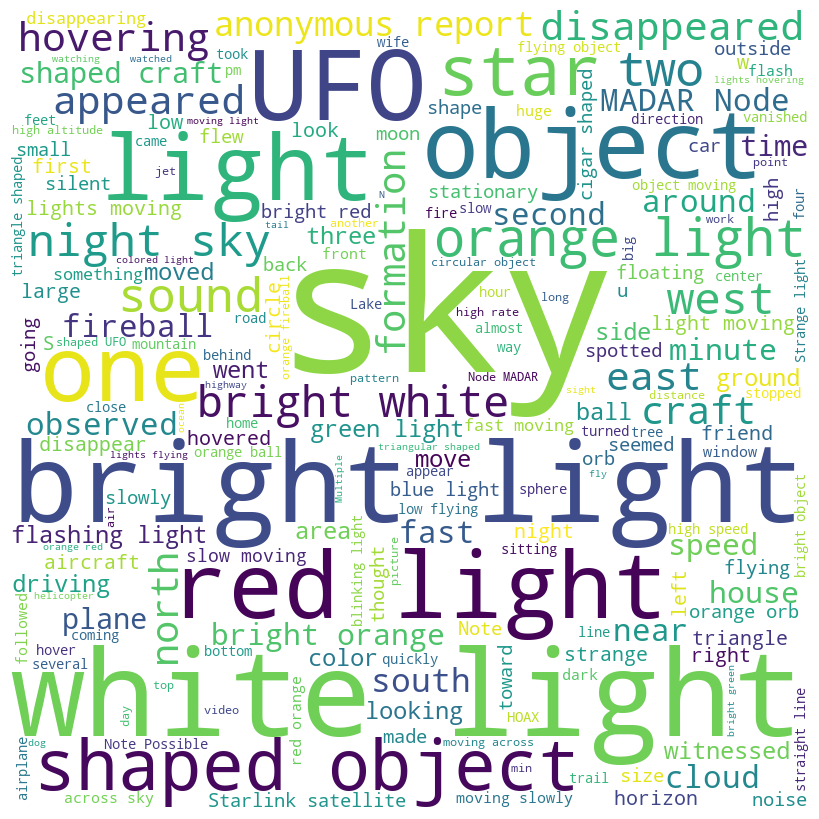

In [14]:
# Filter out NaN values and convert non-null values to strings
all_text = ' '.join(str(text) for text in UFO_df['summary'] if isinstance(text, str))

# Define list of stopwords
custom_stopwords = ["the", "and", "in", "of", "to", "for", "on", "with", "a", "an", "saw", "see", "seen", "looked",
                        "sighting", "NUFORC", "noticed"]

# Create a WordCloud object with stopwords
wordcloud = WordCloud(
    width=800, height=800, background_color='white',
    stopwords=STOPWORDS.union(set(custom_stopwords)),
    max_words=200
).generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Preliminary Analysis of the Dataset

Over the past decade, there has been a noticeable uptick in UFO sightings, a trend that could be attributed to advancements in reporting mechanisms and the heightened media attention around the phenomenon. A significant portion of these reports often describes visual elements such as lights and flashes. However, one must exercise caution before drawing conclusions as these descriptions could easily be mistaken for commercial or military aircraft under certain conditions.

The shape most frequently reported is circular, offering a consistent narrative among numerous witnesses. Geographically, a higher concentration of sightings is recorded on the U.S. east coast compared to its west coast counterpart. Furthermore, a pattern emerges where sightings are more prevalent closer to coastlines, suggesting a potential origin from across the seas. In contrast, the U.S. Midwest seems to experience fewer reported encounters, emphasizing the disparities in sighting frequencies across regions.

### Predicative Model Exploration and Comparisons

In the quest to discern patterns and predict UFO sightings, this project embarks on a comparative analysis of four distinct machine learning models: Neural Networks, Long Short-Term Memory (LSTM), Convolutional Neural Networks (CNN), and a Hybrid model that combines features from the previous three.

**Neural Networks (NN):** These are foundational to deep learning, consisting of interconnected nodes or "neurons". They are particularly adept at handling non-linear data, making them a natural choice for our complex dataset with multiple features.
 

**Long Short-Term Memory (LSTM):** A special kind of Recurrent Neural Network (RNN), LSTMs are designed to recognize patterns over time or sequences. Given that UFO sightings might have temporal patterns or sequences, LSTMs can potentially capture these nuances.

**Convolutional Neural Networks (CNN):** Primarily used for image and video recognition tasks, CNNs have layers that can automatically and adaptively learn spatial hierarchies from the data. While unconventional for this kind of data, their ability to detect patterns in various scales and locations in the data might provide unexpected insights.

**Hybrid Model:** This innovative approach combines the strengths of NN, LSTM, and CNN. By harnessing the individual capabilities of each model, the Hybrid aims to offer a more holistic view, potentially improving prediction accuracy.

Recognizing the inherent challenges in pinpointing exact geographical and temporal markers, custom loss functions have been devised for the project. Instead of aiming for precise geocoordinates, a tolerance range of up to 50km is deemed acceptable. This is based on the understanding that UFO sightings, by nature, might not be restricted to precise locations. Similarly, for dates, an exact match might be elusive due to various reporting or recording delays. Therefore, a prediction within a three-day window is considered a success. These customized loss functions not only cater to the unique nature of the dataset but also introduce a practical approach to measuring model accuracy.

### Import Libraries for Machine Learning Processes

In [15]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

#TensorFLow NN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from keras.models import Model

#LSTM Model
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional

#CNN Model
from tensorflow.keras import layers, Model, optimizers
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Hybrid Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import BatchNormalization

### Custom Loss Functions

In [5]:
# Geocoordinates Loss Function
def haversine_distance_loss(y_true, y_pred):
    R = 6371  # Radius of the earth in kilometers

    lat1, lon1 = y_true[..., 0], y_true[..., 1]
    lat2, lon2 = y_pred[..., 0], y_pred[..., 1]

    lat1, lon1, lat2, lon2 = [x * np.pi / 180 for x in [lat1, lon1, lat2, lon2]]

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = tf.sin(dlat / 2)**2 + tf.cos(lat1) * tf.cos(lat2) * tf.sin(dlon / 2)**2
    c = 2 * tf.atan2(tf.sqrt(a), tf.sqrt(1 - a))

    distance = R * c
    acceptable_range = 50  # You can change this based on your needs

    return tf.reduce_mean(tf.maximum(distance - acceptable_range, 0))


# For Date
def custom_loss_days(y_true, y_pred):
    acceptable_range_days = 3
    y_true_float = tf.cast(y_true, tf.float32)  # Casting y_true to float32
    loss = tf.abs(y_true_float - y_pred)
    return tf.reduce_mean(tf.maximum(loss - acceptable_range_days, 0))

### Loss Graphing Function

In [6]:
def plot_training_loss(history):
    """
    Plots the training loss from a Keras history object.

    Args:
    - history: A Keras history object, returned from model.fit().

    Returns:
    - None (displays a matplotlib plot).
    """
    # Plotting the loss for the training data
    plt.figure(figsize=(12, 6))

    # Extracting the loss and the validation loss values
    loss = history.history['loss']

    # Plotting the loss values
    plt.plot(loss, label='Training Loss', color='blue')

    # If validation loss is available, plot that as well
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(val_loss, label='Validation Loss', color='red')

    # Setting the title and labels
    plt.title('Model Loss Progress During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.legend()

    # Display the plot
    plt.show()

### TensorFlow Neural Network Model

In [7]:
class UFO_SightingsNNModel:
    def __init__(self, data):
        self.data = data
        self.X = None
        self.y_latitude = None
        self.y_longitude = None
        self.y_date = None
        self.model = None
        self.scaler = RobustScaler()




    def prepare_data(self):
        # Make a copy of the input DataFrame to avoid modifying the original
        self.data = self.data.copy()

        # Convert the 'date_time_of_sighting' column to datetime objects
        self.data['date_time_of_sighting'] = pd.to_datetime(self.data['date_time_of_sighting'], errors='coerce')

        # Sort the dataframe by the 'date_time_of_sighting' column in ascending order
        self.data.sort_values(by='date_time_of_sighting', ascending=True, inplace=True)


        # One-hot encode the "shape" column
        possible_shapes = self.data['shape'].unique()
        onehot_encoder = OneHotEncoder(categories=[possible_shapes], sparse=False)
        shape_encoded = onehot_encoder.fit_transform(self.data[['shape']])
        shape_encoded_df = pd.DataFrame(shape_encoded, columns=possible_shapes)

        # Concatenate the one-hot encoded shapes with the original data
        self.data = pd.concat([self.data, shape_encoded_df], axis=1)

        # Find the year of the first sighting
        first_year = self.data["date_time_of_sighting"].min().year

        # Calculate the number of days since January 1 of the first sighting's year
        self.data["days_since_reference"] = (self.data["date_time_of_sighting"] - pd.to_datetime(f"{first_year}-01-01")).dt.days

        # Define the list of columns to keep for training
        columns_to_keep = possible_shapes.tolist() + ['days_since_reference', 'city_latitude', 'city_longitude']

        # Keep only the specified columns
        self.data = self.data[columns_to_keep].reset_index(drop=True)




    def split_data(self, test_size=0.1, random_state=None):
        # Split the data into X and y
        self.X = self.data.drop(columns=['city_latitude', 'city_longitude', 'days_since_reference'])
        targets = self.data[['city_latitude', 'city_longitude', 'days_since_reference']]
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(self.X, targets, test_size=test_size, random_state=random_state)

        self.y_latitude_train = self.y_train['city_latitude']
        self.y_longitude_train = self.y_train['city_longitude']
        self.y_date_train = self.y_train['days_since_reference']




    def build_model(self, input_shape):
        input_layer = Input(shape=input_shape)

        # Hidden layers
        x = Dense(512, activation='relu')(input_layer) 
        x = Dropout(0.3)(x)                            
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.3)(x)                            
        x = Dense(128, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)            
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)           
        x = Dense(16, activation='relu')(x)
        x = Dense(16, activation='relu')(x)           


        # Output layers for days_since_reference, and city_coordinates (latitude and longitude)
        days_since_reference_output = Dense(1, activation='linear', name='days_since_reference_output')(x)
        city_coordinates_output = Dense(2, activation='linear', name='city_coordinates_output')(x)

        model = Model(inputs=input_layer, outputs=[days_since_reference_output, city_coordinates_output])

        # Compile the model
        model.compile(
            optimizer=Adam(learning_rate=0.0001),
            loss={
                'days_since_reference_output': custom_loss_days,
                'city_coordinates_output': haversine_distance_loss
            },
            metrics=['mae']
        )

        return model




    def scale_data(self):
        """
        Scales the input features using RobustScaler.
        """
        self.X_train = self.scaler.fit_transform(self.X_train)
        if hasattr(self, 'X_test') and self.X_test is not None:
            self.X_test = self.scaler.transform(self.X_test)




    def train_model(self, batch_size=32, epochs=100, verbose=1):
        if self.X_train is None or self.y_latitude_train is None or self.y_longitude_train is None or self.y_date_train is None:
            raise ValueError("Data has not been split yet. Call the split_data method first.")

        input_shape = self.X_train.shape[1:] # Assuming self.X_train is already prepared
        self.model = self.build_model(input_shape)

        # Train the model
        history = self.model.fit(
            self.X_train,
            {
                'days_since_reference_output': self.y_date_train,
                'city_coordinates_output': self.y_train[['city_latitude', 'city_longitude']]
            },
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose
        )

        print("Training completed.")
        return history



    
    def evaluate_model(self, verbose=1):
        # Note: Checking attributes
        if self.X_test is None or self.y_test is None or self.model is None:
            raise ValueError("Data has not been split or model has not been built. Ensure split_data and train_model methods have been called first.")

        # If y_test is a dictionary, pass it directly; otherwise, pass it as a single output
        evaluation_targets = self.y_test if isinstance(self.y_test, dict) else [self.y_test]

        evaluation_metrics = self.model.evaluate(
            self.X_test,
            evaluation_targets,
            verbose=verbose
        )

        print("Model evaluation completed.")
        for name, value in zip(self.model.metrics_names, evaluation_metrics):
            print(f"{name}: {value}")

        return evaluation_metrics



    
    def get_data(self):
        return self.data

In [ ]:
# Assuming 'data' is a pandas DataFrame containing your UFO sightings data
NNmodel = UFO_SightingsNNModel(UFO_df)

# Preparing the data
NNmodel.prepare_data()

# Splitting the data into training and testing sets
NNmodel.split_data()

# Scaling the data
NNmodel.scale_data()

# Training the model
NNhistory = NNmodel.train_model()


In [9]:
# Evaluate the model on the test data
NNevaluation_metrics = NNmodel.evaluate_model()

382/382 [==============================] - 1s 2ms/step - loss: 18424.9512 - days_since_reference_output_loss: 18424.9512 - city_coordinates_output_loss: 0.0000e+00 - days_since_reference_output_mae: 18427.9512 - city_coordinates_output_mae: 0.0000e+00
Model evaluation completed.
loss: 18424.951171875
days_since_reference_output_loss: 18424.951171875
city_coordinates_output_loss: 0.0
days_since_reference_output_mae: 18427.951171875
city_coordinates_output_mae: 0.0


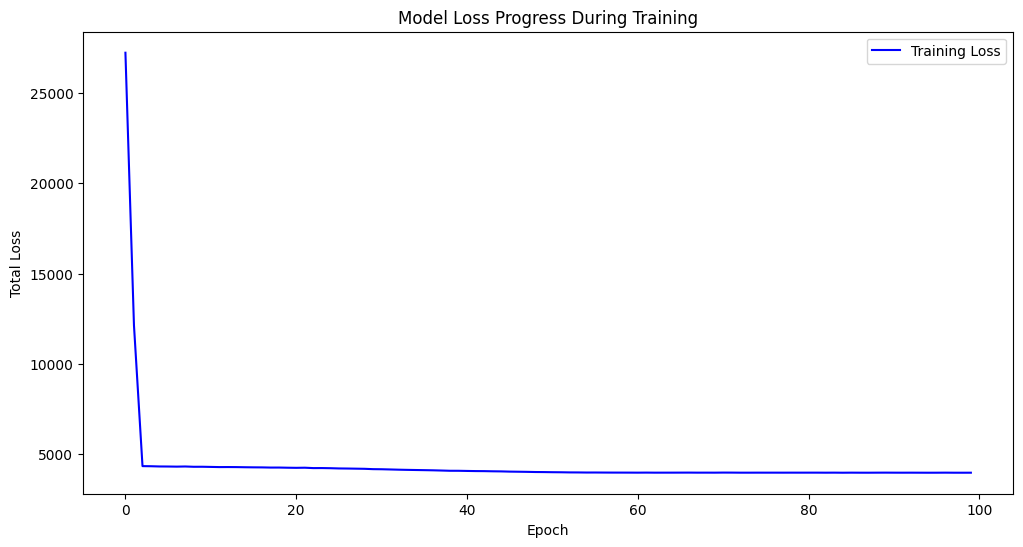

In [10]:
plot_training_loss(NNhistory)

### LSTM Model

In [45]:
class UFO_SightingsLSTMModel(UFO_SightingsNNModel):

    def prepare_data(self, sequence_length):
        # Make a copy of the input DataFrame to avoid modifying the original
        self.data = self.data.copy()

        # Convert the 'date_time_of_sighting' column to datetime objects
        self.data['date_time_of_sighting'] = pd.to_datetime(self.data['date_time_of_sighting'], errors='coerce')

        # Sort the dataframe by the 'date_time_of_sighting' column in ascending order
        self.data.sort_values(by='date_time_of_sighting', ascending=True, inplace=True)

        # One-hot encode the "shape" column
        possible_shapes = self.data['shape'].unique()
        onehot_encoder = OneHotEncoder(categories=[possible_shapes], sparse=False)
        shape_encoded = onehot_encoder.fit_transform(self.data[['shape']])
        shape_encoded_df = pd.DataFrame(shape_encoded, columns=possible_shapes)

        # Concatenate the one-hot encoded shapes with the original data
        self.data = pd.concat([self.data, shape_encoded_df], axis=1)

        # Find the year of the first sighting
        first_year = self.data["date_time_of_sighting"].min().year

        # Calculate the number of days since January 1 of the first sighting's year
        self.data["days_since_reference"] = (self.data["date_time_of_sighting"] - pd.to_datetime(f"{first_year}-01-01")).dt.days

        # Define the list of columns to keep for training
        columns_to_keep = possible_shapes.tolist() + ['days_since_reference']

        # Keep only the specified columns for features
        features = self.data[columns_to_keep].reset_index(drop=True)

        # Prepare targets
        targets = self.data[['city_latitude', 'city_longitude', 'days_since_reference']].reset_index(drop=True)

        # Reshaping the data into sequences
        sequences = []
        target_sequences = []
        for i in range(len(features) - sequence_length):
            sequence = features.iloc[i:i+sequence_length].values.reshape(sequence_length, -1)
            sequences.append(sequence)
            target_sequences.append(targets.iloc[i + sequence_length - 1].values)

        self.X = np.array(sequences)
        self.y_coordinates = np.array([[target[0], target[1]] for target in target_sequences]) # Combining latitude and longitude
        self.y_dates = np.array([target[2] for target in target_sequences])




    def split_data(self, test_size=0.2, random_state=42):
        ...
        # Assuming you've set these data attributes in your prepare_data method
        X, y_dates, y_coordinates = self.X, self.y_dates, self.y_coordinates

        # Splitting the data
        self.X_train, self.X_test, y_dates_train, y_dates_test = train_test_split(X, y_dates, test_size=test_size, random_state=random_state)
        _, _, y_coordinates_train, y_coordinates_test = train_test_split(X, y_coordinates, test_size=test_size, random_state=random_state)

        # Now, set self.y_train and self.y_test as lists of the separate targets
        self.y_train = [y_dates_train, y_coordinates_train]
        self.y_test = [y_dates_test, y_coordinates_test]




    def scale_data(self):
        """
        Scales the input features using RobustScaler.
        """
        # Reshape the data to 2 dimensions
        original_shape = self.X_train.shape
        reshaped_X_train = self.X_train.reshape(-1, original_shape[-1])

        # Fit and transform the scaler
        reshaped_X_train = self.scaler.fit_transform(reshaped_X_train)

        # Reshape the data back to its original shape
        self.X_train = reshaped_X_train.reshape(original_shape)

        if hasattr(self, 'X_test') and self.X_test is not None:
            original_shape_test = self.X_test.shape
            reshaped_X_test = self.X_test.reshape(-1, original_shape_test[-1])
            reshaped_X_test = self.scaler.transform(reshaped_X_test)
            self.X_test = reshaped_X_test.reshape(original_shape_test)




    def build_model(self, input_shape):
        input_layer = Input(shape=input_shape)

        # LSTM layers
        x = LSTM(512, return_sequences=True)(input_layer)  
        x = Dropout(0.3)(x)
        x = Bidirectional(LSTM(256, return_sequences=True))(x) 
        x = Dropout(0.3)(x)
        x = LSTM(128, return_sequences=True)(x)
        x = Dropout(0.3)(x)
        x = LSTM(64)(x)

        # Dense layers
        x = Dense(64, activation='relu')(x) 
        x = Dense(32, activation='relu')(x)  
        x = Dense(16, activation='relu')(x)

        # Output layers for days_since_reference, and city_coordinates
        days_since_reference_output = Dense(1, activation='linear', name='days_since_reference_output')(x)
        city_coordinates_output = Dense(2, activation='linear', name='city_coordinates_output')(x)

        model = Model(inputs=input_layer, outputs=[days_since_reference_output, city_coordinates_output])

        # Compile the model with custom loss functions
        model.compile(Adam(learning_rate=0.0005),
                      loss={
                          'days_since_reference_output': custom_loss_days,
                          'city_coordinates_output': haversine_distance_loss
                      },
                      metrics=['mae'])

        return model




    def train_model(self, batch_size=32, epochs=100, verbose=1):
        if self.X_train is None or self.y_train is None:
            raise ValueError("Data has not been split yet. Call the split_data method first.")

        # Get the input shape, assuming self.X_train has been prepared with the correct 3D shape
        input_shape = self.X_train.shape[1:]

        # Build and compile the model
        self.model = self.build_model(input_shape)

        # Train the model
        history = self.model.fit(
            self.X_train,
            self.y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose
        )

        print("Training completed.")
        return history

    


    def predict(self, X_new):
        """
        Predict the number of days since reference and city coordinates using the trained LSTM model.

        Parameters:
            - X_new: New data sequences. Shape should be (num_sequences, sequence_length, num_features).

        Returns:
            - Predictions for the number of days since reference and city coordinates.
        """
        if not hasattr(self, 'model') or self.model is None:
            raise ValueError("The model has not been built and trained yet. Call the build_model and train_model methods first.")

        # Making predictions
        predicted_days, predicted_coordinates = self.model.predict(X_new)

        # Return the predictions
        return predicted_days, predicted_coordinates

In [ ]:
# Assuming 'data' is a pandas DataFrame containing your UFO sightings data
LSTMmodel = UFO_SightingsLSTMModel(UFO_df)

# Preparing the data
sequence_length = 10  # or whatever value makes sense for your data
LSTMmodel.prepare_data(sequence_length)

# Splitting the data into training and testing sets
LSTMmodel.split_data(sequence_length)

# Scaling the data
LSTMmodel.scale_data()

# Training the model
LSTMhistory = LSTMmodel.train_model()

In [47]:
# Evaluate the LSTM model on the test data
LSTMevaluation_metrics = LSTMmodel.evaluate_model()

1/1 [==============================] - 2s 2s/step - loss: 1343.4541 - days_since_reference_output_loss: 7.8102 - city_coordinates_output_loss: 1335.6439 - days_since_reference_output_mae: 10.6324 - city_coordinates_output_mae: 8.8500
Model evaluation completed.
loss: 1343.4541015625
days_since_reference_output_loss: 7.810156345367432
city_coordinates_output_loss: 1335.6439208984375
days_since_reference_output_mae: 10.632421493530273
city_coordinates_output_mae: 8.850041389465332


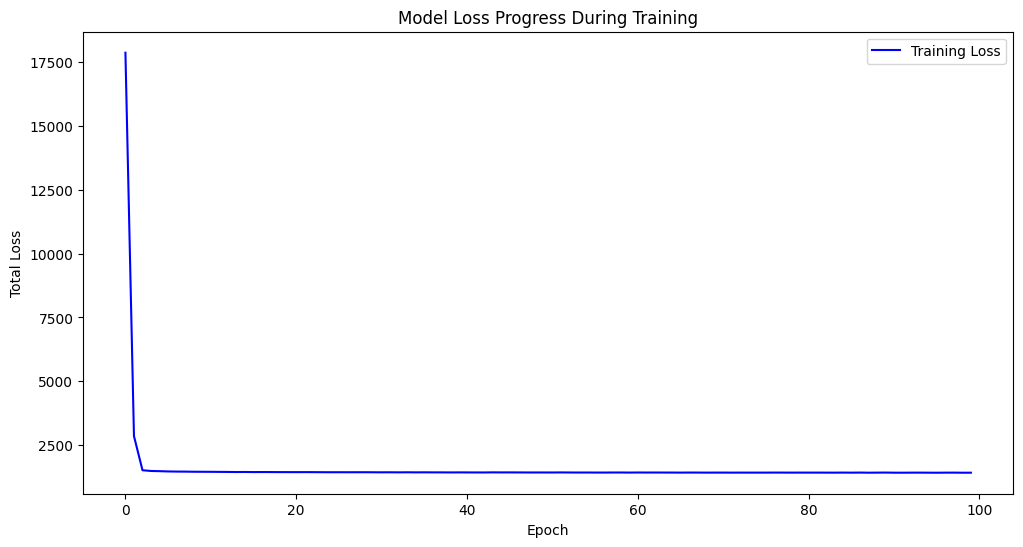

In [48]:
plot_training_loss(LSTMhistory)

### CNN Model

In [15]:
class UFO_SightingsCNNModel(UFO_SightingsNNModel):

    def __init__(self, data):
        super().__init__(data)  # Call the constructor of the base class

        if self.X is not None:
            self.X = np.expand_dims(self.X, axis=-1)




    def create_sequences(self, data, sequence_length):
        sequences = []
        for i in range(len(data) - sequence_length + 1):
            sequences.append(data[i:i + sequence_length])
        return np.array(sequences)




    def split_data(self, test_size=0.1, random_state=None, sequence_length=10):
        # Split the data into X and y
        self.X = self.data.drop(columns=['city_latitude', 'city_longitude', 'days_since_reference'])
        targets = self.data[['city_latitude', 'city_longitude', 'days_since_reference']]
        X_train, X_test, y_train, y_test = train_test_split(self.X, targets, test_size=test_size, random_state=random_state)

        # Create sequences from the training and test data
        self.X_train = self.create_sequences(X_train.values, sequence_length)
        self.X_test = self.create_sequences(X_test.values, sequence_length)

        # Add channel dimension for the CNN
        self.X_train = np.expand_dims(self.X_train, axis=-1)
        self.X_test = np.expand_dims(self.X_test, axis=-1)

        # Align the targets with the sequences and reshape
        self.y_train = [y_train['days_since_reference'].values[sequence_length - 1:],
                        np.hstack((y_train['city_latitude'].values[sequence_length - 1:].reshape(-1, 1),
                                   y_train['city_longitude'].values[sequence_length - 1:].reshape(-1, 1)))]

        self.y_test = [y_test['days_since_reference'].values[sequence_length - 1:],
                       np.hstack((y_test['city_latitude'].values[sequence_length - 1:].reshape(-1, 1),
                                  y_test['city_longitude'].values[sequence_length - 1:].reshape(-1, 1)))]



        
    def scale_data(self):
        """
        Scales the 3D input features using RobustScaler.
        """
        num_instances, num_timesteps, num_features, num_channels = self.X_train.shape

        # Reshape the training data to 2D
        X_train_2D = self.X_train.reshape(-1, num_features)
        self.X_train = self.scaler.fit_transform(X_train_2D).reshape(num_instances, num_timesteps, num_features, num_channels)

        # If there's test data, apply the same transformation
        if hasattr(self, 'X_test') and self.X_test is not None:
            num_instances_test, _, _, _ = self.X_test.shape
            X_test_2D = self.X_test.reshape(-1, num_features)
            self.X_test = self.scaler.transform(X_test_2D).reshape(num_instances_test, num_timesteps, num_features, num_channels)



            
    def build_model(self, input_shape):
        # Define the input layer
        input_tensor = layers.Input(shape=input_shape, name="image_input")

        # 1st Convolutional Layer
        x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
        x = layers.BatchNormalization()(x)

        # 2nd Convolutional Layer
        x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
        x = layers.BatchNormalization()(x)

        # 3rd Convolutional Layer
        x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = layers.Dropout(0.25)(x)
        x = layers.BatchNormalization()(x)

        # 4th Convolutional Layer
        x = layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(x)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = layers.Dropout(0.25)(x)

        # Flatten the feature maps
        flatten = layers.Flatten()(x)

        # Dense Layers
        dense = layers.Dense(units=512, activation="relu")(flatten)
        dense = layers.Dropout(0.5)(dense)

        dense = layers.Dense(units=256, activation="relu")(dense)
        dense = layers.Dropout(0.5)(dense)

        # Output for days_since_reference
        days_since_reference_output = layers.Dense(units=1, activation="linear", name="days_since_reference_output")(dense)

        # Combined output for latitude and longitude
        lat_lon_output = layers.Dense(units=2, activation="linear", name="lat_lon_output")(dense)

        # Assemble the model
        model = Model(inputs=input_tensor, outputs=[days_since_reference_output, lat_lon_output])

        # Compile the model
        model.compile(
            optimizer=Adam(learning_rate=0.0005),
            loss={
                'days_since_reference_output': custom_loss_days,
                'lat_lon_output': haversine_distance_loss
            },
            metrics={
                'days_since_reference_output': 'mae',
                'lat_lon_output': 'mae'
            }
        )

        return model




    def train_model(self, batch_size, epochs, verbose):
        # Determine input shape
        input_shape = self.X_train.shape[1:]

        # Build the model
        self.model = self.build_model(input_shape)

        # Train the model
        history = self.model.fit(
            self.X_train,
            {
                'days_since_reference_output': self.y_train[0],
                'lat_lon_output': self.y_train[1]
            },
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose
        )
        print("Training completed.")
        return history

In [ ]:
# Assuming 'data' is a pandas DataFrame containing your UFO sightings data
CNNmodel = UFO_SightingsCNNModel(UFO_df)

# Preparing the data
CNNmodel.prepare_data()

# Split the data, including the sequence length that you want to use
sequence_length = 10  # or whatever value you want to use for sequence length
CNNmodel.split_data(test_size=0.1, sequence_length=sequence_length)

#Scale the Data
CNNmodel.scale_data()

# Training the model
CNNhistory = CNNmodel.train_model(batch_size=32, epochs=100, verbose=1)

In [18]:
CNNevaluation_metrics = CNNmodel.evaluate_model()

382/382 [==============================] - 3s 5ms/step - loss: 4063.7029 - days_since_reference_output_loss: 2660.5781 - lat_lon_output_loss: 1403.1263 - days_since_reference_output_mae: 2663.5774 - lat_lon_output_mae: 9.7231
Model evaluation completed.
loss: 4063.702880859375
days_since_reference_output_loss: 2660.578125
lat_lon_output_loss: 1403.1263427734375
days_since_reference_output_mae: 2663.577392578125
lat_lon_output_mae: 9.723084449768066


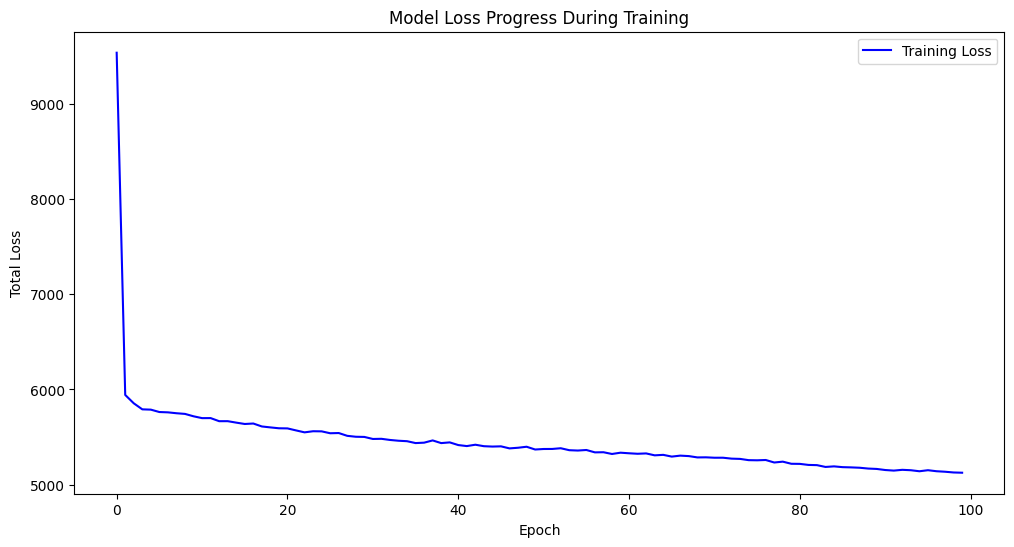

In [19]:
plot_training_loss(CNNhistory)

### Hybrid Model

In [21]:
class UFO_SightingsHybridModel(UFO_SightingsNNModel):

    def split_data(self, test_size=0.1, sequence_length=10, random_state=None):
        # Split the data into X and y
        self.X = self.data.drop(columns=['city_latitude', 'city_longitude', 'days_since_reference'])
        targets = self.data[['city_latitude', 'city_longitude', 'days_since_reference']]

        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(self.X, targets, test_size=test_size, random_state=random_state)

        num_sequences_train = len(self.X_train) // sequence_length
        num_sequences_test = len(self.X_test) // sequence_length

        self.X_train = self.X_train[:num_sequences_train * sequence_length]
        self.y_train = self.y_train[:num_sequences_train * sequence_length]
        self.X_train = self.X_train.values.reshape(-1, sequence_length, self.X_train.shape[1])

        self.X_test = self.X_test[:num_sequences_test * sequence_length]
        self.y_test = self.y_test[:num_sequences_test * sequence_length]
        self.X_test = self.X_test.values.reshape(-1, sequence_length, self.X_test.shape[1])

        # Process targets to be in accordance with the model's output
        y_latitude_last_value_train = self.y_train['city_latitude'].values.reshape(-1, sequence_length)[:, -1]
        y_longitude_last_value_train = self.y_train['city_longitude'].values.reshape(-1, sequence_length)[:, -1]

        self.y_train = [
            self.y_train['days_since_reference'].values.reshape(-1, sequence_length)[:, -1],
            np.column_stack((y_latitude_last_value_train, y_longitude_last_value_train))
        ]

        y_latitude_last_value_test = self.y_test['city_latitude'].values.reshape(-1, sequence_length)[:, -1]
        y_longitude_last_value_test = self.y_test['city_longitude'].values.reshape(-1, sequence_length)[:, -1]

        self.y_test = [
            self.y_test['days_since_reference'].values.reshape(-1, sequence_length)[:, -1],
            np.column_stack((y_latitude_last_value_test, y_longitude_last_value_test))
        ]




    def scale_data(self):
        """
        Scales the 3D input features using RobustScaler.
        """
        num_sequences, num_timesteps, num_features = self.X_train.shape

        # Reshape the training data to 2D
        X_train_2D = self.X_train.reshape(-1, num_features)
        self.X_train = self.scaler.fit_transform(X_train_2D).reshape(num_sequences, num_timesteps, num_features)

        # If there's test data, apply the same transformation
        if self.X_test is not None:
            num_sequences_test, _, _ = self.X_test.shape
            X_test_2D = self.X_test.reshape(-1, num_features)
            self.X_test = self.scaler.transform(X_test_2D).reshape(num_sequences_test, num_timesteps, num_features)




    def build_model(self, input_shape):
        input_layer = Input(shape=input_shape)

        # Convolutional layers with Batch Normalization and Increased Filters
        x = Conv1D(256, kernel_size=3, activation='relu', padding='same')(input_layer)
        x = BatchNormalization()(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling1D(pool_size=2)(x)

        # Bidirectional LSTM with Dropout
        x = Bidirectional(LSTM(200, return_sequences=True, dropout=0.2))(x)
        x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2))(x)
        x = LSTM(50, dropout=0.2)(x)

        # Dense layers with Dropout
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.3)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.3)(x)

        # Output layers
        city_latitude_output = Dense(1, activation='linear')(x)
        city_longitude_output = Dense(1, activation='linear')(x)
        days_since_reference_output = Dense(1, activation='linear', name='days_since_reference_output')(x)

        # Combine outputs
        lat_lon_output = concatenate([city_latitude_output, city_longitude_output], axis=-1, name='lat_lon_output')

        model = Model(inputs=input_layer, outputs=[days_since_reference_output, lat_lon_output])

        # Losses
        losses = {
            'days_since_reference_output': custom_loss_days,
            'lat_lon_output': haversine_distance_loss
        }

        # Compile
        model.compile(optimizer=Adam(learning_rate=0.0005), loss=losses, metrics=['mae'])

        return model




    def train_model(self, batch_size, epochs, verbose=1):
        input_shape = (self.X_train.shape[1], self.X_train.shape[2])
        self.model = self.build_model(input_shape)

        # Train the model
        history = self.model.fit(
            self.X_train,
            {
                'days_since_reference_output': self.y_train[0],
                'lat_lon_output': self.y_train[1]  # Updated target for latitude and longitude
            },
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose
        )

        print("Training completed.")
        return history

In [ ]:
# Create an instance of the UFO_SightingsHybridModel class
hybrid_model = UFO_SightingsHybridModel(UFO_df)

# Prepare data
hybrid_model.prepare_data()

# Split the data, including the sequence length
sequence_length = 10  
hybrid_model.split_data(test_size=0.1, sequence_length=sequence_length)

#Scale the Data
hybrid_model.scale_data()

# Train the model
Hybridhistory = hybrid_model.train_model(batch_size=32, epochs=100, verbose=1)

In [23]:
Hybridevaluation_metrics = hybrid_model.evaluate_model()

39/39 [==============================] - 3s 10ms/step - loss: 4324.4780 - days_since_reference_output_loss: 2810.9956 - lat_lon_output_loss: 1513.4824 - days_since_reference_output_mae: 2813.9941 - lat_lon_output_mae: 10.4755
Model evaluation completed.
loss: 4324.47802734375
days_since_reference_output_loss: 2810.99560546875
lat_lon_output_loss: 1513.482421875
days_since_reference_output_mae: 2813.994140625
lat_lon_output_mae: 10.47549819946289


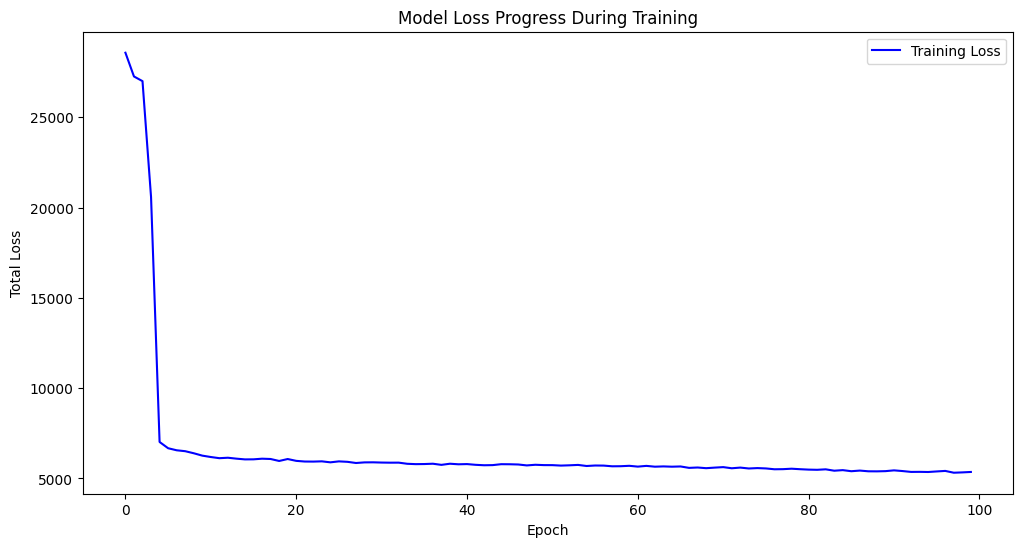

In [24]:
plot_training_loss(Hybridhistory)

### Performance Analysis of the Models

Upon training the various machine learning models and comparing their predictive capabilities, it became evident that the Long Short-Term Memory (LSTM) model exhibited superior performance. LSTMs, with their inherent ability to recognize and remember patterns over sequences, seemed particularly adept at capturing the intricacies and temporal trends present in the UFO sightings data.

While the other models provided valuable insights and had their unique strengths, the LSTM consistently outperformed them in terms of prediction accuracy within the predefined acceptable ranges. Its ability to handle sequential data and consider historical context gave it a distinct advantage, allowing it to more accurately forecast the patterns in UFO sightings, both geographically and temporally. This underscores the significance of selecting the right model architecture tailored to the nature of the data at hand.

### Predictions with LSTM Model

In [49]:
predicted_days, predicted_coordinates = LSTMmodel.predict(LSTMmodel.X_test)

1/1 [==============================] - 1s 1s/step


In [ ]:
# Create a base map
m = folium.Map(location=[40, -95], zoom_start=4)  # Centered around USA

# Add actual sightings numbers to the map
for idx, (lat, lon) in enumerate(zip(actual_latitude, actual_longitude)):
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(html=f"""<div style="color: blue; background-color: white; border-radius: 50%; padding: 2px;">{idx+1}</div>""")
    ).add_to(m)

# Add predicted sightings numbers to the map
for idx, (lat, lon) in enumerate(zip(predicted_latitude, predicted_longitude)):
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(html=f"""<div style="color: red; background-color: white; border-radius: 50%; padding: 2px;">{idx+1}</div>""")
    ).add_to(m)

# Display the map - NOT DISPLAYING DUE TO DISK SPACE RESTRICTIONS
# m

![Map Screenshot](map2.jpg)

In [62]:
# Get actual_days and actual_coordinates
actual_days = LSTMmodel.y_test[0].flatten()  # Flattening here, just to be sure
actual_coordinates = LSTMmodel.y_test[1]

# Flatten the predicted_days array to ensure it's 1D
predicted_days = predicted_days.flatten()

# Calculate differences
km_diff = np.linalg.norm(predicted_coordinates - actual_coordinates, axis=1) * 111  # Using 111 to convert degrees to kilometers roughly
days_diff = np.abs(predicted_days - actual_days)

# Create a dataframe to visualize the results
results_df = pd.DataFrame({
    'Predicted Latitude': predicted_coordinates[:, 0],
    'Actual Latitude': actual_coordinates[:, 0],
    'Predicted Longitude': predicted_coordinates[:, 1],
    'Actual Longitude': actual_coordinates[:, 1],
    'Km Difference': km_diff,
    'Predicted Days': predicted_days,
    'Actual Days': actual_days,
    'Days Difference': days_diff
})

results_df

,Predicted Latitude,Actual Latitude,Predicted Longitude,Actual Longitude,Km Difference,Predicted Days,Actual Days,Days Difference
0,40.609554,33.712587,-92.233833,-78.938773,1662.507251,26219.941406,26201.0,18.941406
1,40.288692,39.282500,-92.110603,-77.852200,1586.618674,29027.341797,29025.0,2.341797
2,40.226955,38.752875,-95.897957,-77.479791,2050.953658,22580.308594,22568.0,12.308594
3,40.111401,41.162500,-95.463402,-83.415600,1342.385823,22791.349609,22774.0,17.349609
4,40.352139,40.752564,-97.000160,-73.984457,2555.129704,21792.376953,21789.0,3.376953
5,40.082882,35.599100,-91.770500,-81.030500,1291.860253,30043.880859,30042.0,1.880859
6,40.109432,42.905501,-95.464531,-78.855607,1869.532444,22777.304688,22753.0,24.304688
7,41.022823,28.812229,-93.894905,-97.005547,1398.664825,27760.099609,27744.0,16.099609
8,40.397411,38.528100,-97.003029,-76.984200,2231.756610,21837.189453,21832.0,5.189453
9,41.359585,41.589084,-94.591896,-81.522614,1450.913967,29382.531250,29378.0,4.531250


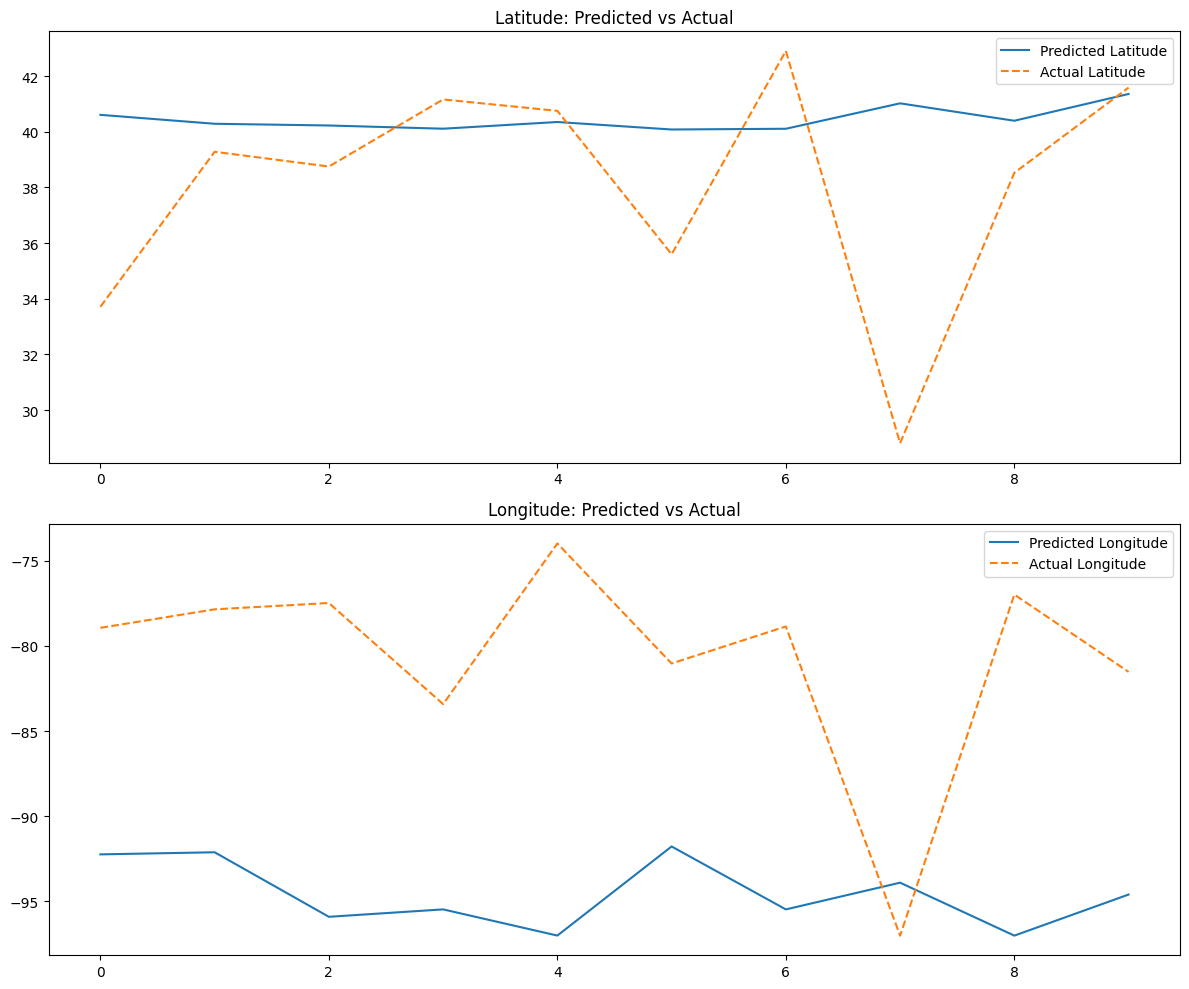

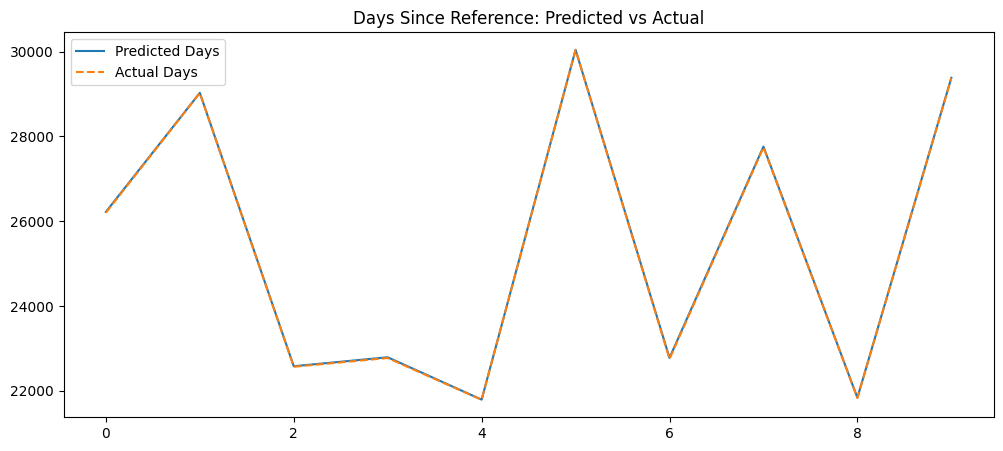

In [63]:
# Visual representation

# Latitude and Longitude
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].plot(predicted_coordinates[:, 0], label='Predicted Latitude')
ax[0].plot(actual_coordinates[:, 0], label='Actual Latitude', linestyle='--')
ax[0].set_title('Latitude: Predicted vs Actual')
ax[0].legend()

ax[1].plot(predicted_coordinates[:, 1], label='Predicted Longitude')
ax[1].plot(actual_coordinates[:, 1], label='Actual Longitude', linestyle='--')
ax[1].set_title('Longitude: Predicted vs Actual')
ax[1].legend()

plt.tight_layout()
plt.show()

# Days since reference
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(predicted_days, label='Predicted Days')
ax.plot(actual_days, label='Actual Days', linestyle='--')
ax.set_title('Days Since Reference: Predicted vs Actual')
ax.legend()

plt.show()

### Conclusions and Analysis

The quest to discern patterns in UFO sightings, using the parameters of shapes, locations, and dates, has yielded some fascinating insights, even if not the ones initially anticipated. As demonstrated by the results, the predictive models exhibited considerable discrepancies between the actual and anticipated latitudes and longitudes of UFO sightings. Similarly, the temporal prediction—days since a reference date—also manifested significant disparities. This reinforces the notion that predicting UFO sightings, much like many natural phenomena, may be far more intricate than initially perceived.

Several factors can be attributed to these unexpected results. Firstly, the intrinsic randomness and scarcity of reliable UFO sighting data can pose significant challenges. Without patterns that are consistent and statistically significant, even the most advanced models can falter. Secondly, UFO sightings, by their very nature, are reports based on individual human experiences which can be influenced by a myriad of subjective factors such as psychological, sociocultural, or environmental conditions. Consequently, predicting them with high precision might require more diverse data sources and potentially different approaches that go beyond conventional predictive modeling.

Despite these challenges, this project serves as a pivotal exploratory study in understanding the complexities surrounding UFO sightings. While the predictions were not as successful as hoped, the learnings acquired offer a foundation for future investigations and emphasize the intricacies of attempting to decode such multifaceted phenomena.